# PLOT-RESULTS

There we go...

In [1]:
import pickle
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path

from pprint import pprint

In [2]:
DKPN_SCORES = {}
pickles_DKPN = Path(".").glob("Results_ETHZ_*/results_DKPN.pickle")

for pp in pickles_DKPN:
    pp = str(pp)
    SIZE = pp.split("/")[0].split("_")[-1]
    # Load the pickle file
    with open(pp, 'rb') as file:
        loaded_data = pickle.load(file)
    DKPN_SCORES[SIZE] = loaded_data

In [3]:
PN_SCORES = {}
pickles_PN = Path(".").glob("Results_ETHZ_*/results_PN.pickle")

for pp in pickles_PN:
    pp = str(pp)
    SIZE = pp.split("/")[0].split("_")[-1]
    # Load the pickle file
    with open(pp, 'rb') as file:
        loaded_data = pickle.load(file)
    PN_SCORES[SIZE] = loaded_data

--------------------------------------

# PLOT RESULTS

Here we plot the results of the scores

In [4]:
color_list = ["darkgoldenrod", "magenta", "blue"]
sns.set(style='darkgrid')  # Set the style of the plot


def extract_dict_values(indict, what_list, order=["NANO3", "NANO2", "NANO1", "NANO", "MICRO", "TINY"]):
    value_lists = []
    for key in what_list:
        value_list = [indict[item][key] for item in order]
        value_lists.append(value_list)

    return value_lists


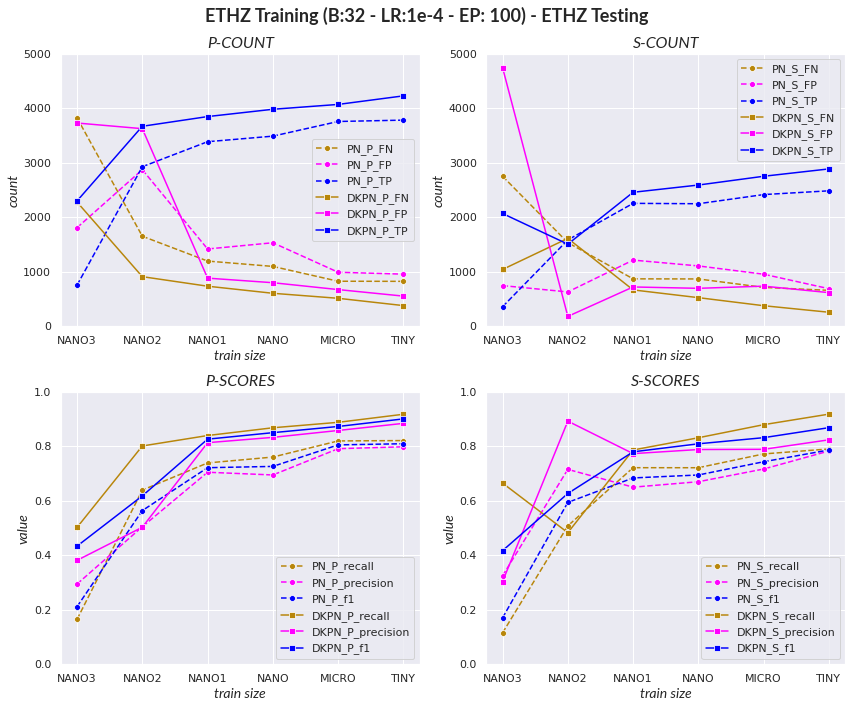

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# ===============================================================
# ========================================  AX-1 --> scores P
ax = axs[0,0]

# --- Get VALS
key_list = ["P_FN", "P_FP", "P_TP"]
x_labels = ["NANO3", "NANO2", "NANO1", "NANO", "MICRO", "TINY"]

VALUES_DKPN = extract_dict_values(DKPN_SCORES, key_list, order=x_labels)
VALUES_PN = extract_dict_values(PN_SCORES, key_list, order=x_labels)

for i, values in enumerate(VALUES_PN):
    sns.lineplot(x=x_labels, y=values, marker='o', linestyle="dashed", 
                 label="PN_"+key_list[i], ax=ax, color=color_list[i])

for i, values in enumerate(VALUES_DKPN):
    sns.lineplot(x=x_labels, y=values, marker='s', label="DKPN_"+key_list[i], 
                 ax=ax, color=color_list[i])

# --- Decorator
ax.set_ylim([0, 5000])
ax.set_xlabel('train size', fontstyle='italic', fontsize=14, fontname="Lato")
ax.set_ylabel('count', fontstyle='italic', fontsize=14, fontname="Lato")
ax.set_title('P-COUNT', fontstyle='italic', fontsize=16, fontname="Lato")   # Set the title of the plot
ax.legend()  # Display the legend



# ===============================================================
# ========================================  AX-3 --> Scores P
ax = axs[1,0]

# --- Get VALS
key_list = ["P_recall", "P_precision", "P_f1"]
x_labels = ["NANO3", "NANO2", "NANO1", "NANO", "MICRO", "TINY"]

VALUES_DKPN = extract_dict_values(DKPN_SCORES, key_list, order=x_labels)
VALUES_PN = extract_dict_values(PN_SCORES, key_list, order=x_labels)

for i, values in enumerate(VALUES_PN):
    sns.lineplot(x=x_labels, y=values, marker='o', linestyle="dashed", 
                 label="PN_"+key_list[i], ax=ax, color=color_list[i])

for i, values in enumerate(VALUES_DKPN):
    sns.lineplot(x=x_labels, y=values, marker='s', label="DKPN_"+key_list[i], 
                 ax=ax, color=color_list[i])

# --- Decorator
ax.set_ylim([0, 1])
ax.set_xlabel('train size', fontstyle='italic', fontsize=14, fontname="Lato")
ax.set_ylabel('value', fontstyle='italic', fontsize=14, fontname="Lato")
ax.set_title('P-SCORES', fontstyle='italic', fontsize=16, fontname="Lato")   # Set the title of the plot
ax.legend()  # Display the legend



# ===============================================================
# ========================================  AX-2 --> count S
ax = axs[0,1]

# --- Get VALS
key_list = ["S_FN", "S_FP", "S_TP"]
x_labels = ["NANO3", "NANO2", "NANO1", "NANO", "MICRO", "TINY"]

VALUES_DKPN = extract_dict_values(DKPN_SCORES, key_list, order=x_labels)
VALUES_PN = extract_dict_values(PN_SCORES, key_list, order=x_labels)

for i, values in enumerate(VALUES_PN):
    sns.lineplot(x=x_labels, y=values, marker='o', linestyle="dashed", 
                 label="PN_"+key_list[i], ax=ax, color=color_list[i])

for i, values in enumerate(VALUES_DKPN):
    sns.lineplot(x=x_labels, y=values, marker='s', label="DKPN_"+key_list[i], 
                 ax=ax, color=color_list[i])

# --- Decorator
ax.set_ylim([0, 5000])
ax.set_xlabel('train size', fontstyle='italic', fontsize=14, fontname="Lato")
ax.set_ylabel('count', fontstyle='italic', fontsize=14, fontname="Lato")
ax.set_title('S-COUNT', fontstyle='italic', fontsize=16, fontname="Lato")   # Set the title of the plot
ax.legend()  # Display the legend



# ===============================================================
# ========================================  AX-4 --> Count S
ax = axs[1,1]

# --- Get VALS
key_list = ["S_recall", "S_precision", "S_f1"]
x_labels = ["NANO3", "NANO2", "NANO1", "NANO", "MICRO", "TINY"]

VALUES_DKPN = extract_dict_values(DKPN_SCORES, key_list, order=x_labels)
VALUES_PN = extract_dict_values(PN_SCORES, key_list, order=x_labels)

for i, values in enumerate(VALUES_PN):
    sns.lineplot(x=x_labels, y=values, marker='o', linestyle="dashed", 
                 label="PN_"+key_list[i], ax=ax, color=color_list[i])

for i, values in enumerate(VALUES_DKPN):
    sns.lineplot(x=x_labels, y=values, marker='s', label="DKPN_"+key_list[i], 
                 ax=ax, color=color_list[i])

# --- Decorator
ax.set_ylim([0, 1])
ax.set_xlabel('train size', fontstyle='italic', fontsize=14, fontname="Lato")
ax.set_ylabel('value', fontstyle='italic', fontsize=14, fontname="Lato")
ax.set_title('S-SCORES', fontstyle='italic', fontsize=16, fontname="Lato")   # Set the title of the plot
ax.legend()  # Display the legend




# ===============================================================
plt.suptitle('ETHZ Training (B:32 - LR:1e-4 - EP: 100) - ETHZ Testing', fontweight='bold', fontsize=18, fontname="Lato")  #fontfamily='sans-serif')
plt.tight_layout()  # Adjust the spacing between subplots
fig.savefig("ScoresResults.pdf")
plt.show()  # Show the plot



-----------------------------------------------------------

# PLOT DKPN TRAINING CURVES

Here we see the tradeoff curves for train-test loops

In [6]:
from collections import OrderedDict
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

traintestlosses = {}
for pp in Path(".").glob("DKPN_TrainDataSet_ETHZ_*/TRAIN_TEST_loss.csv"):
    pp = str(pp)
    SIZE = pp.split("/")[0].split("_")[4]
    traintestlosses[SIZE] = pd.read_csv(pp)
#
order = ["NANO3", "NANO2", "NANO1", "NANO", "MICRO", "TINY"]
traintestlosses = OrderedDict((key, traintestlosses[key]) for key in order)

In [7]:
nsubs = len(traintestlosses.keys())

_train = [df[" TRAIN_LOSS"] for sz, df in traintestlosses.items()]
_test = [df[" TEST_LOSS"] for sz, df in traintestlosses.items()]
_train = pd.concat([s for s in _train])
_test = pd.concat([s for s in _test])

ylimmax = max(max(_train), max(_test))

/tmp/ipykernel_28592/985189354.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust the spacing between subplots


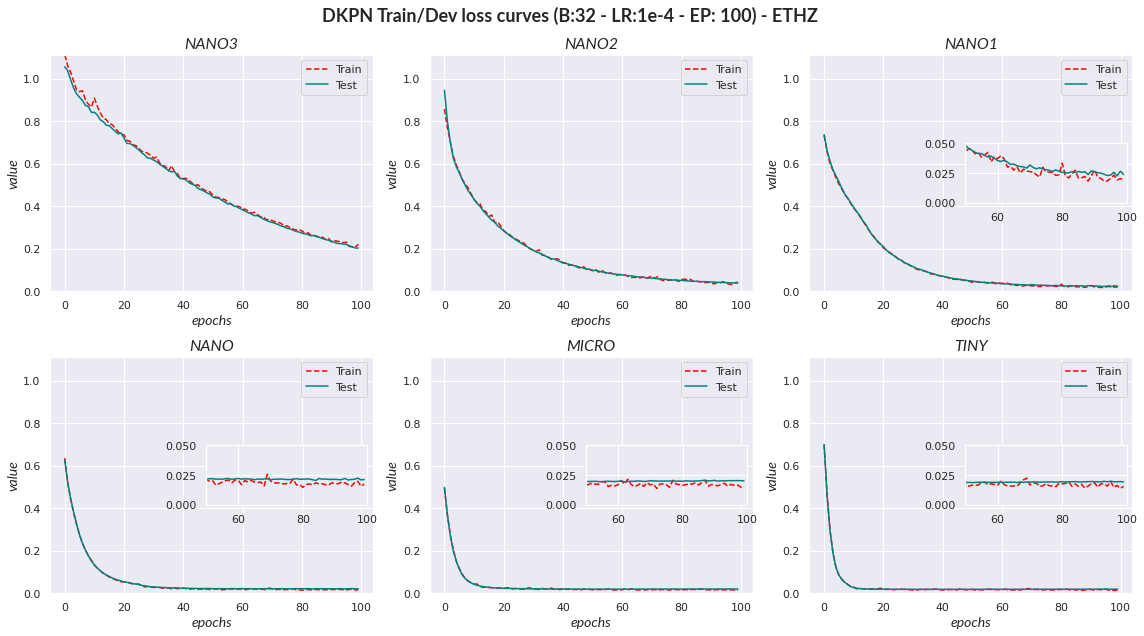

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(16,9))
axs_flat = np.ravel(axs)

for ii, (sz, df) in enumerate(traintestlosses.items()):

    # ===  MAIN
    ax = axs_flat[ii]
    sns.lineplot(x=df["EPOCH"], y=df[" TRAIN_LOSS"], linestyle="dashed", 
                 label="Train", color="red", ax=ax)
    sns.lineplot(x=df["EPOCH"], y=df[" TEST_LOSS"], 
                 label="Test", color="teal", ax=ax)
    #
    ax.set_ylim([0, ylimmax])
    ax.set_xlabel('epochs', fontstyle='italic', fontsize=14, fontname="Lato")
    ax.set_ylabel('value', fontstyle='italic', fontsize=14, fontname="Lato")

    # === decorator
    ax.set_title(sz.upper(), fontstyle='italic', fontsize=16, fontname="Lato")   # Set the title of the plot
    ax.legend()  # Display the legend
    
    # === SUBPANEL
    if ii >= 2:
        ax_subpanel = inset_axes(ax, width="50%", height="25%", loc="center right")
        sns.lineplot(x=df["EPOCH"], y=df[" TRAIN_LOSS"], linestyle="dashed", color="red", ax=ax_subpanel)
        sns.lineplot(x=df["EPOCH"], y=df[" TEST_LOSS"], color="teal", ax=ax_subpanel)
        ax_subpanel.set_xlim([50, 100])
        ax_subpanel.set_ylim([0, 0.05])
        ax_subpanel.set_xlabel('')
        ax_subpanel.set_ylabel('')

# ===============================================================
plt.suptitle('DKPN Train/Dev loss curves (B:32 - LR:1e-4 - EP: 100) - ETHZ', fontweight='bold', fontsize=18, fontname="Lato")  #fontfamily='sans-serif')
plt.tight_layout()  # Adjust the spacing between subplots
fig.savefig("TrainTest_CURVES_DKPN.pdf")
plt.show()  # Show the plot



-----------------------------------------------------------

# PLOT PN TRAINING CURVES

Here we see the tradeoff curves for train-test loops

In [9]:
from collections import OrderedDict
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

traintestlosses = {}
for pp in Path(".").glob("PN_TrainDataSet_ETHZ_*/TRAIN_TEST_loss.csv"):
    pp = str(pp)
    SIZE = pp.split("/")[0].split("_")[4]
    traintestlosses[SIZE] = pd.read_csv(pp)
#
order = ["NANO3", "NANO2", "NANO1", "NANO", "MICRO", "TINY"]
traintestlosses = OrderedDict((key, traintestlosses[key]) for key in order)

In [10]:
nsubs = len(traintestlosses.keys())

_train = [df[" TRAIN_LOSS"] for sz, df in traintestlosses.items()]
_test = [df[" TEST_LOSS"] for sz, df in traintestlosses.items()]
_train = pd.concat([s for s in _train])
_test = pd.concat([s for s in _test])

ylimmax = max(max(_train), max(_test))

/tmp/ipykernel_28592/507493289.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust the spacing between subplots


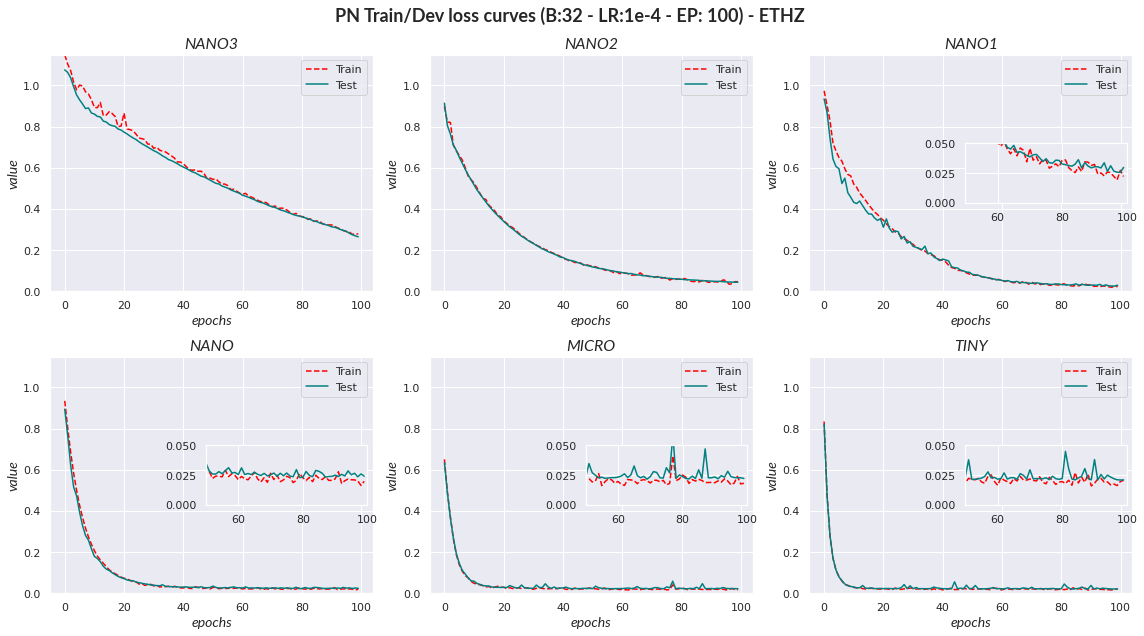

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(16,9))
axs_flat = np.ravel(axs)

for ii, (sz, df) in enumerate(traintestlosses.items()):

    # ===  MAIN
    ax = axs_flat[ii]
    sns.lineplot(x=df["EPOCH"], y=df[" TRAIN_LOSS"], linestyle="dashed", 
                 label="Train", color="red", ax=ax)
    sns.lineplot(x=df["EPOCH"], y=df[" TEST_LOSS"], 
                 label="Test", color="teal", ax=ax)
    #
    ax.set_ylim([0, ylimmax])
    ax.set_xlabel('epochs', fontstyle='italic', fontsize=14, fontname="Lato")
    ax.set_ylabel('value', fontstyle='italic', fontsize=14, fontname="Lato")

    # === decorator
    ax.set_title(sz.upper(), fontstyle='italic', fontsize=16, fontname="Lato")   # Set the title of the plot
    ax.legend()  # Display the legend
    
    # === SUBPANEL
    if ii >= 2:
        ax_subpanel = inset_axes(ax, width="50%", height="25%", loc="center right")
        sns.lineplot(x=df["EPOCH"], y=df[" TRAIN_LOSS"], linestyle="dashed", color="red", ax=ax_subpanel)
        sns.lineplot(x=df["EPOCH"], y=df[" TEST_LOSS"], color="teal", ax=ax_subpanel)
        ax_subpanel.set_xlim([50, 100])
        ax_subpanel.set_ylim([0, 0.05])
        ax_subpanel.set_xlabel('')
        ax_subpanel.set_ylabel('')

    

    
# ===============================================================
plt.suptitle('PN Train/Dev loss curves (B:32 - LR:1e-4 - EP: 100) - ETHZ', fontweight='bold', fontsize=18, fontname="Lato")  #fontfamily='sans-serif')
plt.tight_layout()  # Adjust the spacing between subplots
fig.savefig("TrainTest_CURVES_PN.pdf")
plt.show()  # Show the plot

